In [1]:
import pandas as pd
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
import numpy as np

/Applications/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('../data/basic_data.csv')

In [3]:
data['log_closePrice'] = np.log(data['closePrice'])

In [4]:
colint_stock_list = []

for stock_i in range(50):

    stock_i_df = data[data['stock'] == stock_i]

    for stock_j in range(stock_i+1, 50):
        
        stock_j_df = data[data['stock'] == stock_j]

        outcome = coint(stock_i_df['log_closePrice'], stock_j_df['log_closePrice'])

        if outcome[1] < 0.05:
            colint_stock_list.append(([stock_i, stock_j], outcome))
            print(stock_i, stock_j)


7 41
9 40
13 20
13 40
13 48
17 23
17 31
18 21
18 40
18 41
20 24
20 41
23 46
24 38
25 43
27 34
27 43
31 46
37 40
37 44


7 41


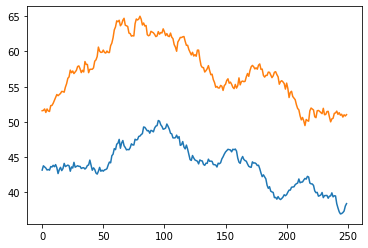

9 40


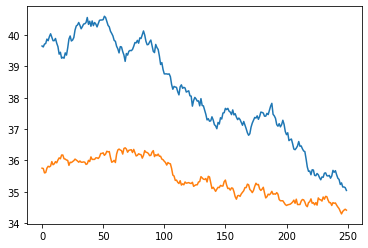

13 20


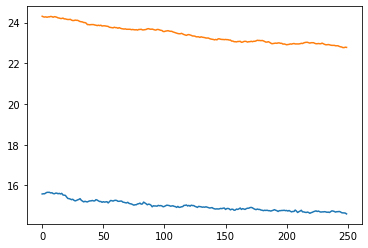

13 40


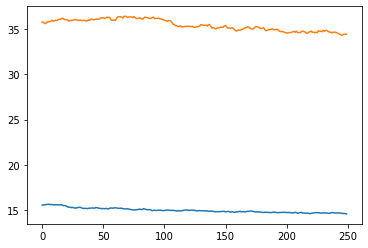

13 48


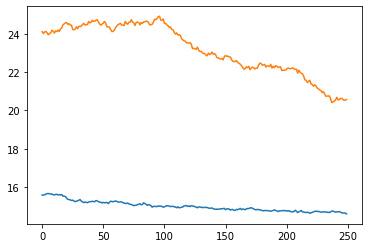

17 23


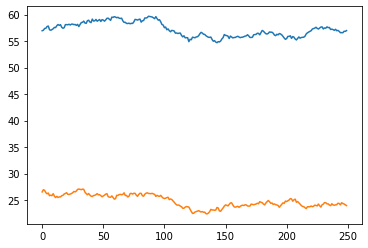

17 31


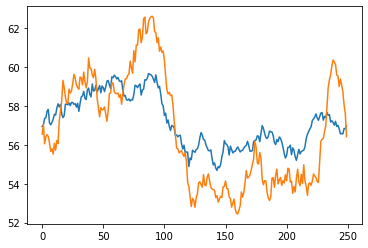

18 21


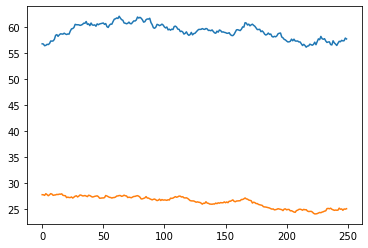

18 40


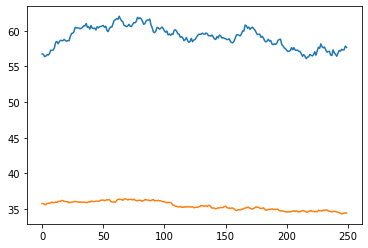

18 41


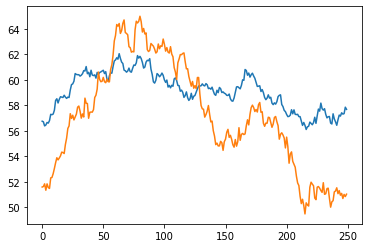

20 24


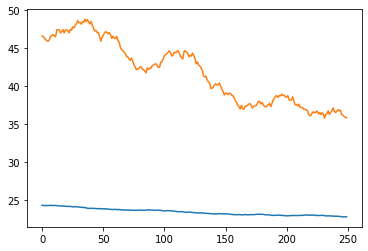

20 41


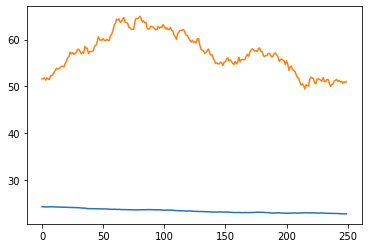

23 46


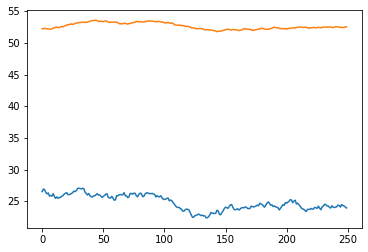

24 38


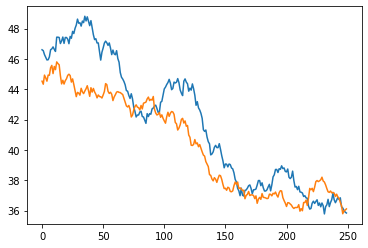

25 43


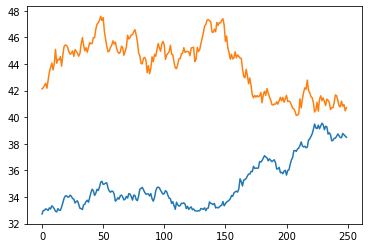

27 34


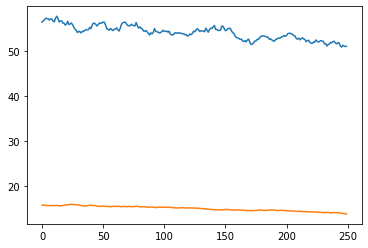

27 43


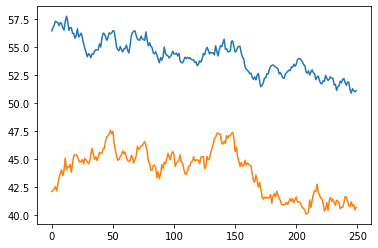

31 46


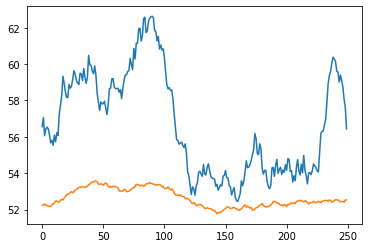

37 40


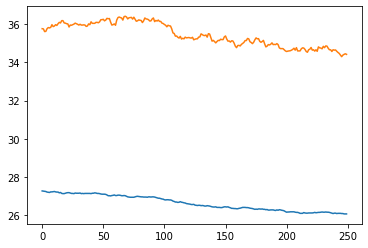

37 44


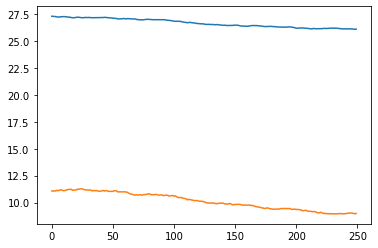

In [5]:
for ([stock_i, stock_j], outcome) in colint_stock_list:
    stock_i_df = data[data['stock'] == stock_i]
    stock_j_df = data[data['stock'] == stock_j]

    print(stock_i, stock_j)

    plt.plot(stock_i_df['date'], stock_i_df['closePrice'], label=stock_i)
    plt.plot(stock_j_df['date'], stock_j_df['closePrice'], label=stock_j)
    plt.show()


In [6]:
colint_stock_list_ct = []

for stock_i in range(50):

    stock_i_df = data[data['stock'] == stock_i]

    for stock_j in range(stock_i+1, 50):
        
        stock_j_df = data[data['stock'] == stock_j]

        outcome = coint(stock_i_df['log_closePrice'], stock_j_df['log_closePrice'], trend = 'ct')

        if outcome[1] < 0.05:
            colint_stock_list_ct.append(([stock_i, stock_j], outcome))
            print(stock_i, stock_j)


8 22
8 26
12 30
13 18
13 20
13 29
13 34
13 41
13 43
13 44
13 48
15 32
15 38
17 37
20 39
22 23
24 38
25 28
27 30
27 37
27 38
27 39
27 46
27 47
31 37
31 46
32 38
34 48
36 41
36 42
36 48


In [7]:
len(colint_stock_list_ct)

31

8 22


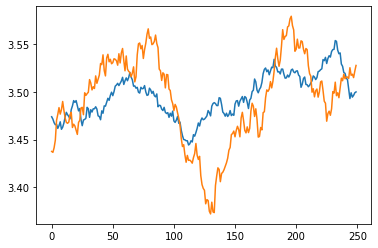

8 26


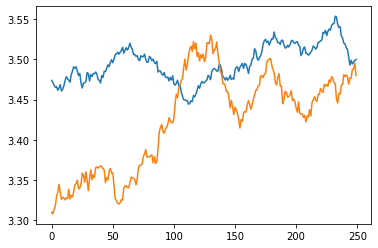

12 30


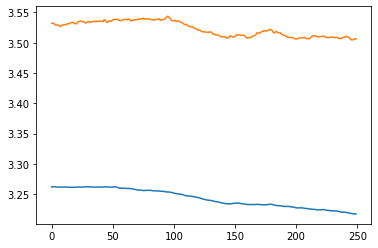

13 18


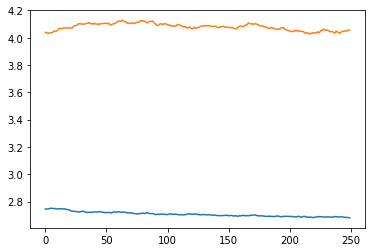

13 20


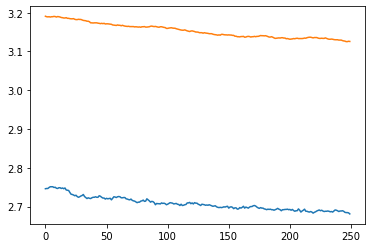

13 29


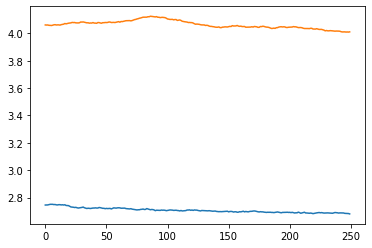

13 34


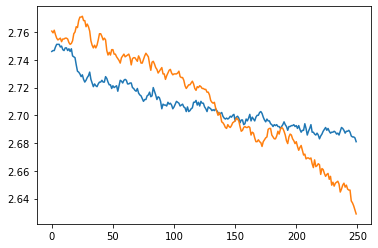

13 41


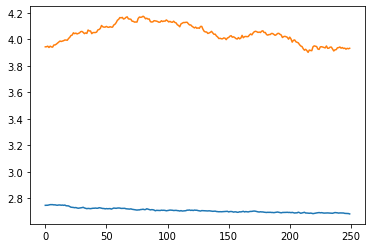

13 43


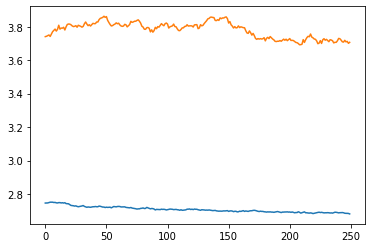

13 44


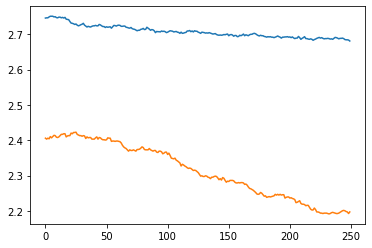

13 48


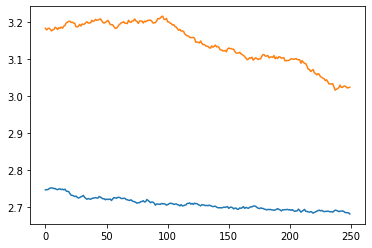

15 32


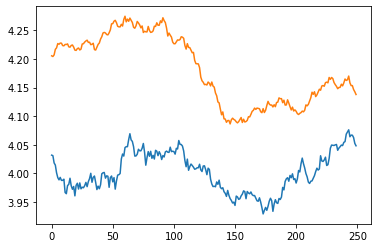

15 38


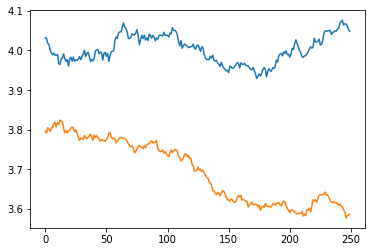

17 37


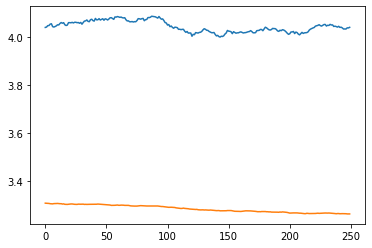

20 39


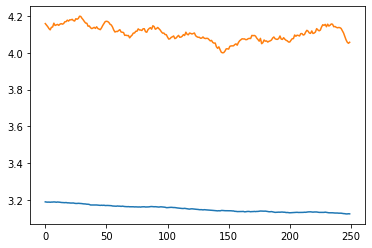

22 23


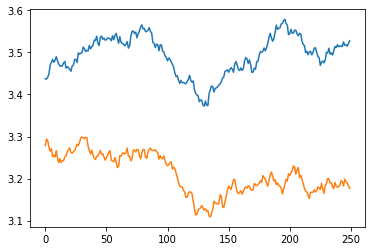

24 38


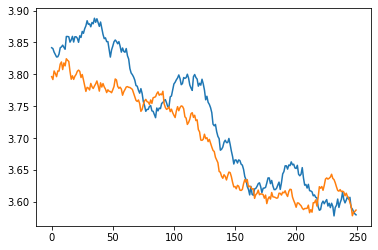

25 28


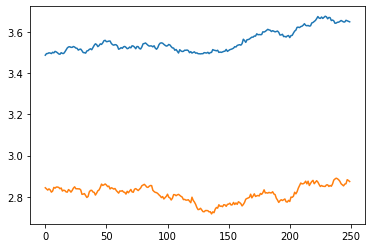

27 30


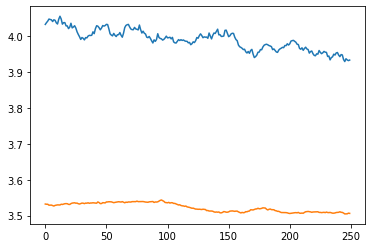

27 37


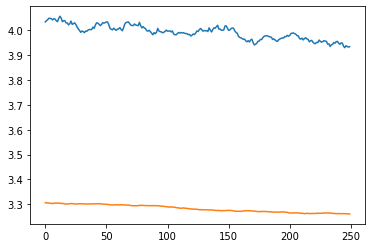

27 38


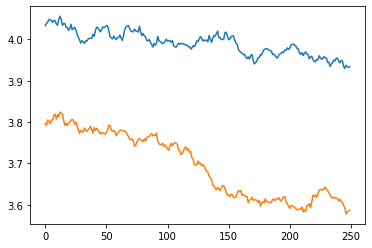

27 39


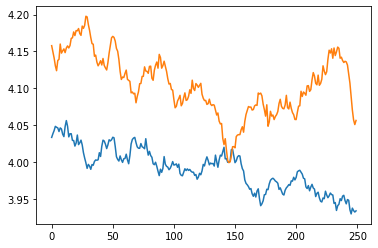

27 46


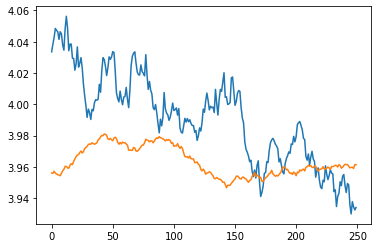

27 47


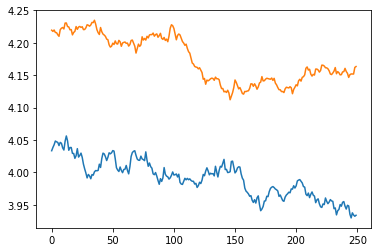

31 37


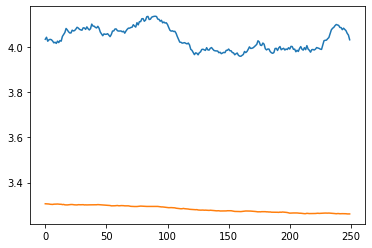

31 46


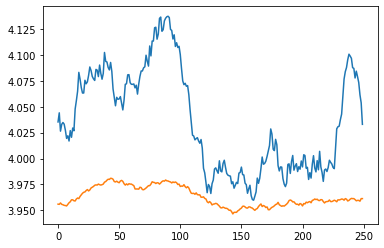

32 38


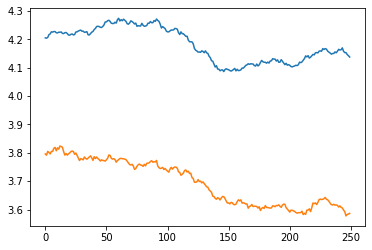

34 48


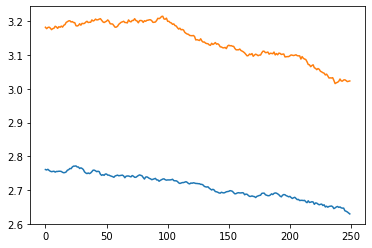

36 41


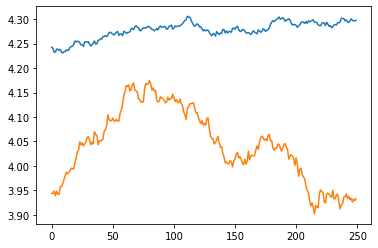

36 42


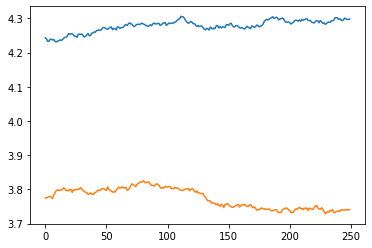

36 48


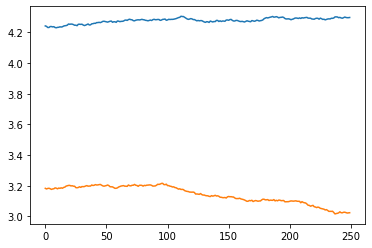

In [8]:
for ([stock_i, stock_j], outcome) in colint_stock_list_ct:
    stock_i_df = data[data['stock'] == stock_i]
    stock_j_df = data[data['stock'] == stock_j]

    print(stock_i, stock_j)

    plt.plot(stock_i_df['date'], stock_i_df['log_closePrice'], label=stock_i)
    plt.plot(stock_j_df['date'], stock_j_df['log_closePrice'], label=stock_j)
    plt.show()
